In [1]:
from pyanp.priority import *
import numpy as np
import random as rnd

In [2]:
def ratio_dist(a, b, zero_uncmp=False):
    if (a == 0) or (b == 0):
        return 1
    else:
        return max(np.abs(a/b), np.abs(b/a))

def ratio_dist_mat(m1, m2, cmp_utm=True):
    rval = 1
    count = 0
    for row in range(len(m1)):
        for col in range(row+1):
            val=ratio_dist(m1[row,col], m2[row,col])
            if val != 0:
                rval *= val
                count += 1
    if count > 0:
        return rval ** (1.0/count)
    else:
        return 1

def ar_consistency(mat, pcalc=pri_eigen):
    pri = pcalc(mat)
    con_mat = ratio_mat(pri)
    return ratio_dist_mat(mat, con_mat)

def rnd_cmp_mat_exp(size, max_vote=9):
    rval = np.identity(size)
    max_exponent = np.log(max_vote)
    for row in range(size):
        for col in range(row+1, size):
            rval[row, col]=np.exp(rnd.random()*max_exponent)
            #Should we invert
            if rnd.random() > 0.5:
                rval[row,col] = 1/rval[row, col]
            rval[col, row] = 1/rval[row, col]
    return rval

def rnd_cmp_mat(size, max_vote=9):
    rval = np.identity(size)
    for row in range(size):
        for col in range(row+1, size):
            rval[row, col]=rnd.random()*(max_vote-1)+1
            #Should we invert
            if rnd.random() > 0.5:
                rval[row,col] = 1/rval[row, col]
            rval[col, row] = 1/rval[row, col]
    return rval

In [3]:
m1 = np.array([
    [1, 2, 5],
    [1/2, 1, 3],
    [1/6, 1/3, 1]
])
ar_consistency(m1)

1.0196202271791608

In [4]:
rnd_matrices = [rnd_cmp_mat(4) for i in range(1000)]

In [5]:
incons = [ar_consistency(mat) for mat in rnd_matrices]

In [6]:
from scipy.stats import percentileofscore

In [7]:
pers = [percentileofscore(incons, x) for x in incons]

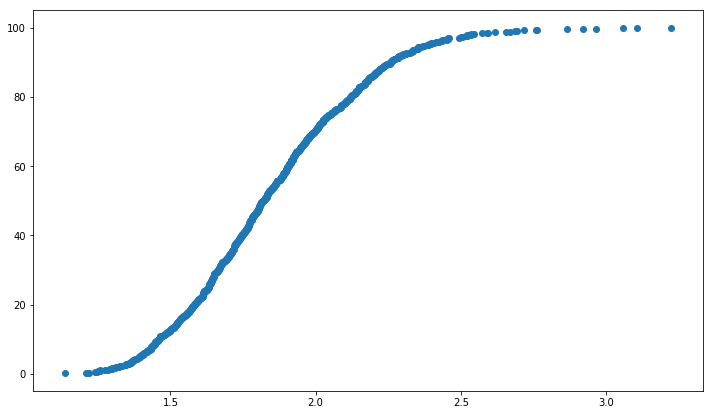

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,7)
plt.scatter(incons, pers)
plt.show()

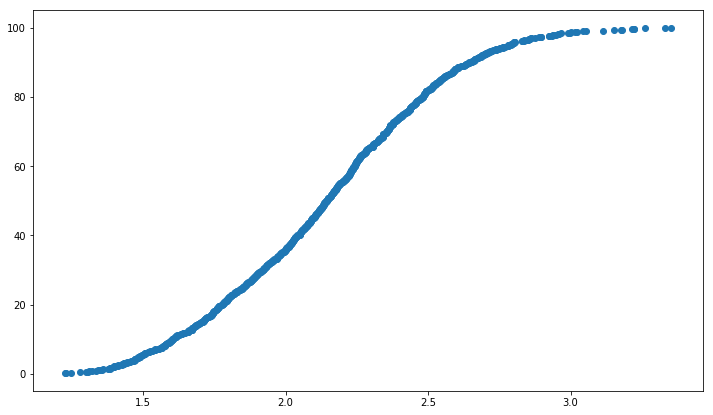

In [18]:
rnd_matrices = [rnd_cmp_mat(5) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

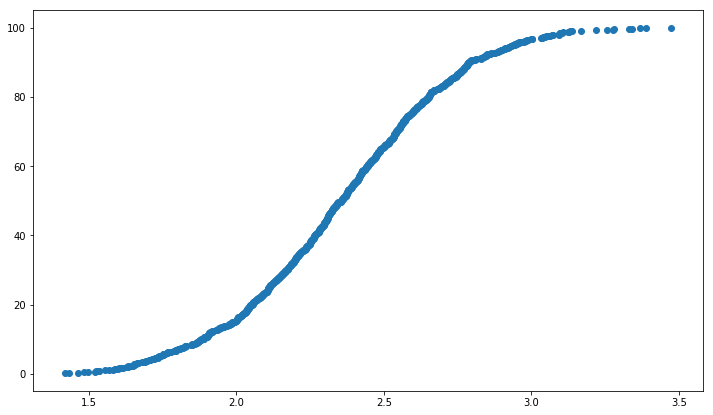

In [19]:
rnd_matrices = [rnd_cmp_mat(6) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

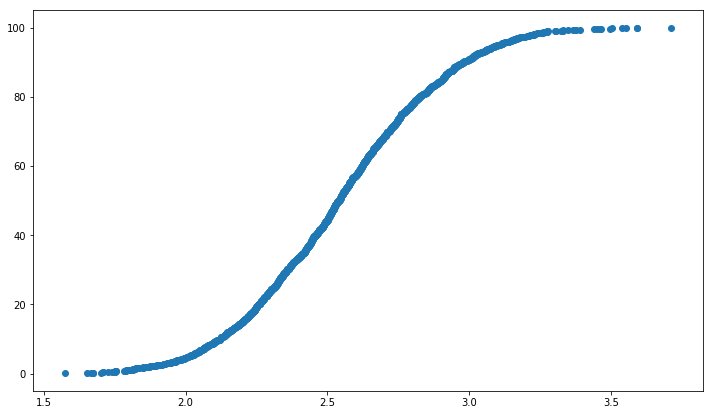

In [20]:
rnd_matrices = [rnd_cmp_mat(7) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

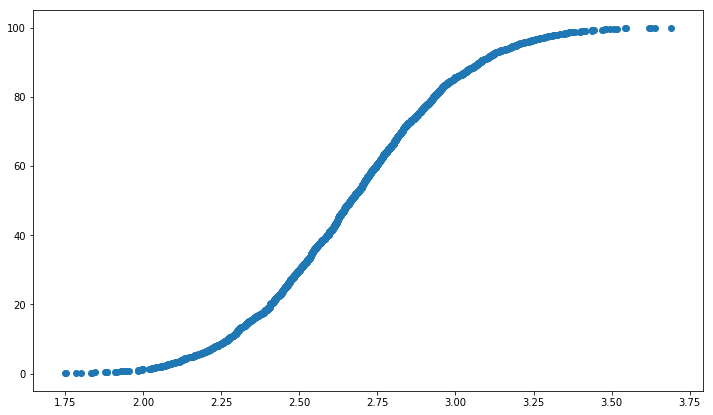

In [21]:
rnd_matrices = [rnd_cmp_mat(8) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

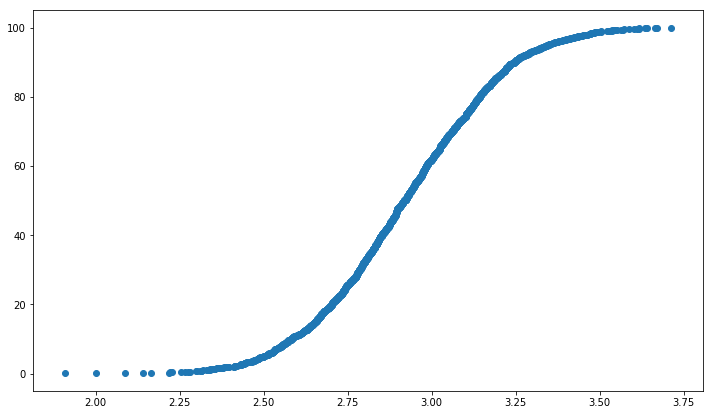

In [22]:
rnd_matrices = [rnd_cmp_mat(10) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

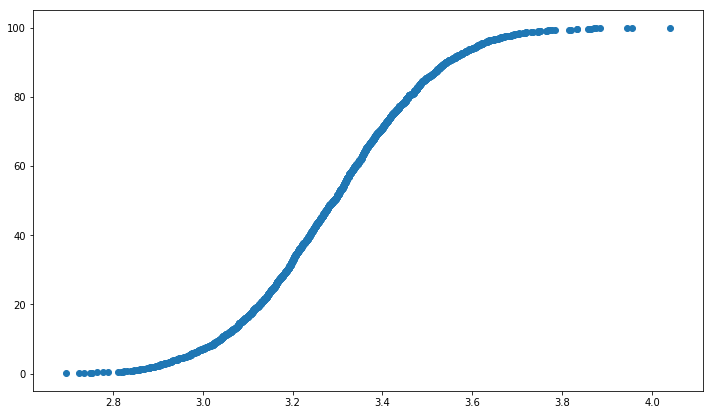

In [23]:
rnd_matrices = [rnd_cmp_mat(15) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

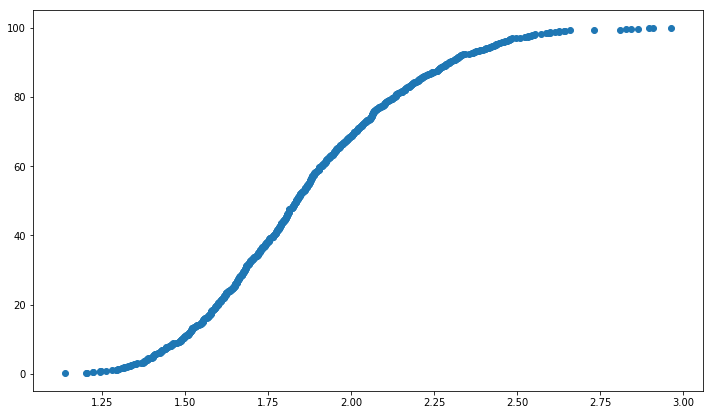

In [24]:
rnd_matrices = [rnd_cmp_mat_exp(5, 10) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

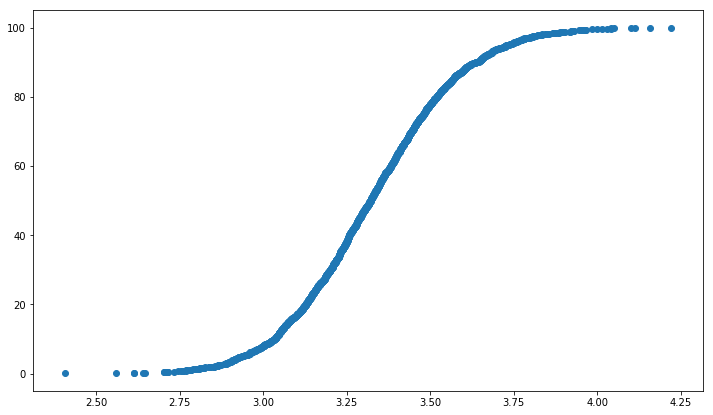

3.1622814218393023

3.3210895474095388

3.4799842748241008

In [25]:
rnd_matrices = [rnd_cmp_mat_exp(15, 18) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()
display(np.percentile(incons, 25))
display(np.percentile(incons, 50))
display(np.percentile(incons, 75))

## Logistic formula with 75% level
Let's find the equation for a logistic defined weirdly
$$f(x)=\frac{a}{1+exp(b(x-x_{infl}))} + y_{\min}$$

Note that $a+y_{\min}=y_{\max}$, or in other words $a=y_{\min} - y_{\max}$.

We need to use the 75% level next:
$$f(x_{75})=0.75(y_{\max} - y_{\min}) + y_{\min} = y_{75}$$
$$\frac{a}{1+exp(b(x_{75}-x_{infl}))} + y_{\min} = y_{75}$$
$$\frac{a}{y_{75}-y_{\min}} = 1 + exp(b(x_{75}-x_{infl}))$$
$$\frac{a}{y_{75}-y_{\min}} - 1 = exp(b(x_{75}-x_{infl}))$$
$$\ln\left(\frac{a}{y_{75}-y_{\min}} - 1\right) = b(x_{75}-x_{infl})$$
$$\ln\left(\frac{a}{y_{75}-y_{\min}} - 1\right)\frac{1}{x_{75}-x_{infl}} = b$$

In [26]:

def logistic2(x, xinfl, x75, ymin, ymax):
    d = ymin
    a = ymax - ymin
    c = xinfl
    y75 = 0.75*(ymax-ymin) + ymin
    b = np.log(abs(a/(y75-ymin)-1))/(x75-xinfl)
    return a/(1+np.exp(b*(x-c))) + d
    

In [27]:
logistic2(2, 1, 2, 0, 1)

0.75

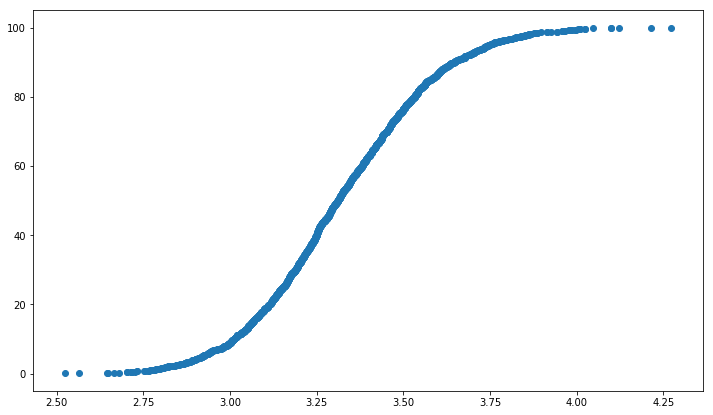

3.153936678185411

3.3116770782681124

3.487618817664239

In [28]:
rnd_matrices = [rnd_cmp_mat_exp(15, 18) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()
display(np.percentile(incons, 25))
display(np.percentile(incons, 50))
display(np.percentile(incons, 75))

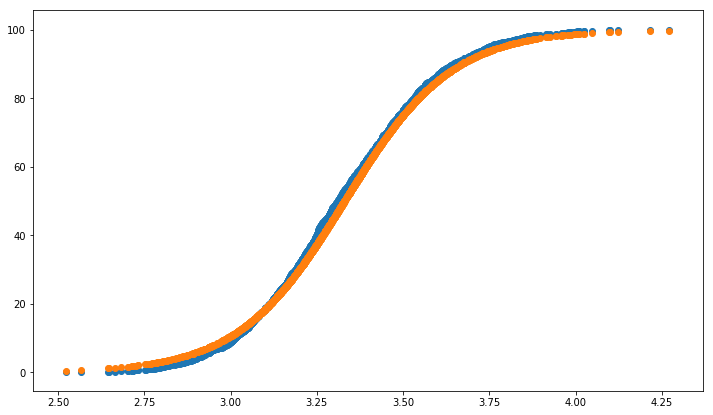

In [29]:
fx = lambda x: logistic2(x, 3.33, 3.5, 0, 100)
preds = [fx(x) - fx(1) for x in incons]
plt.scatter(incons, pers)
plt.scatter(incons, preds)

In [30]:
fx(1)

2.88823209225134e-05

In [31]:
def simulate(size, max_vote=18, nmats=1500):
    rnd_matrices = [rnd_cmp_mat_exp(size, max_vote) for i in range(nmats)]
    incons = [ar_consistency(mat) for mat in rnd_matrices]
    indices = np.argsort(incons)
    rnd_matrices = [rnd_matrices[i] for i in indices]
    incons = [incons[i] for i in indices]
    pers = [percentileofscore(incons, x) for x in incons]
    x25 = np.percentile(incons, 50)
    xinfl = np.percentile(incons, 50)
    x75=np.percentile(incons, 75)
    avg = (x75 - x25)/2
    x75_better = xinfl+avg
    preds = np.array([logistic2(x, xinfl, x75, 0, 100) for x in incons])
    low = min(preds)
    up = max(preds)
    preds = (preds - low)/(up - low) * 100
    plt.plot(incons, pers, "r-", label="Raw Data")
    plt.plot(incons, preds, "b--", label="Exponential Prediction")
    plt.legend()
    plt.show()

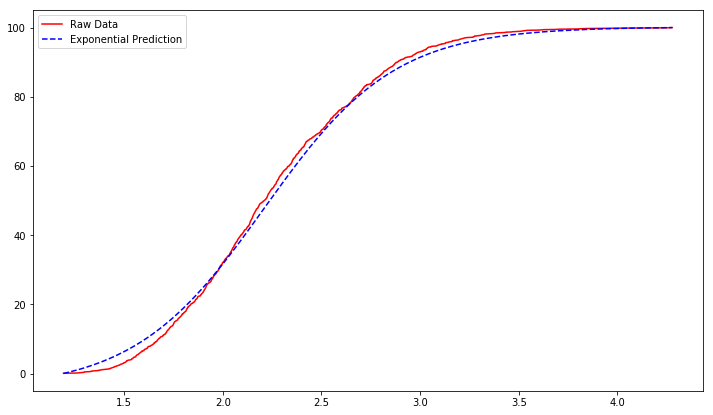

In [32]:
simulate(5)

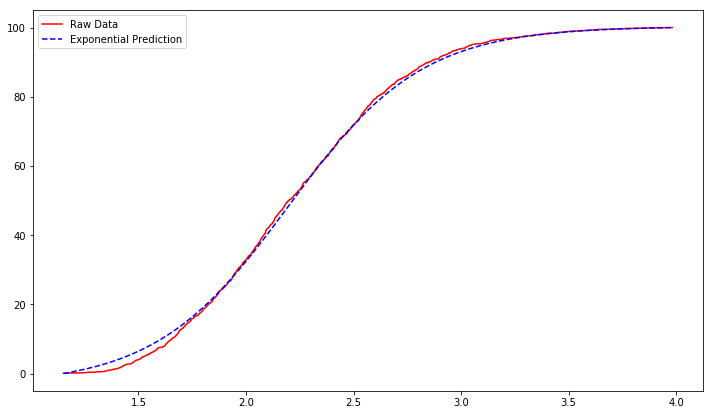

In [33]:
simulate(5)

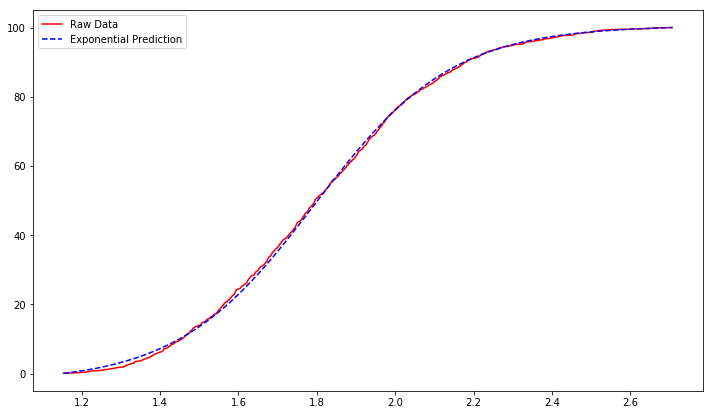

In [34]:
simulate(5, 9)

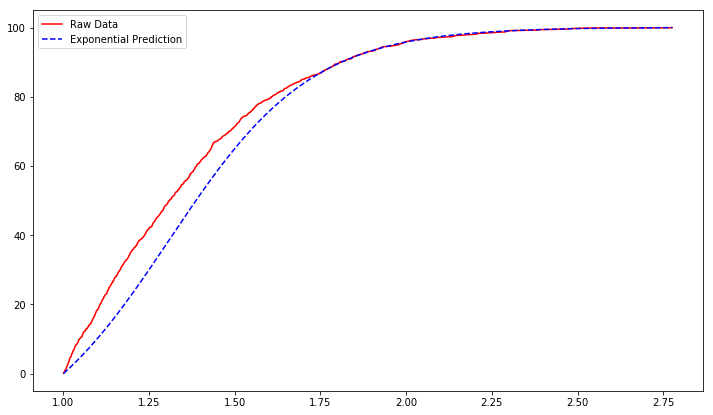

In [35]:
simulate(3,9)

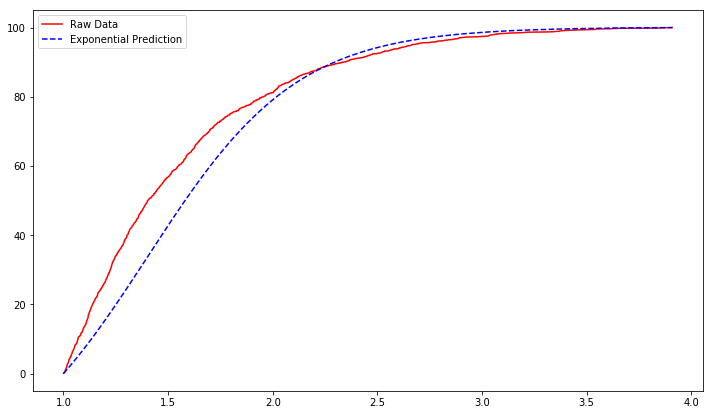

In [36]:
simulate(3, 20)

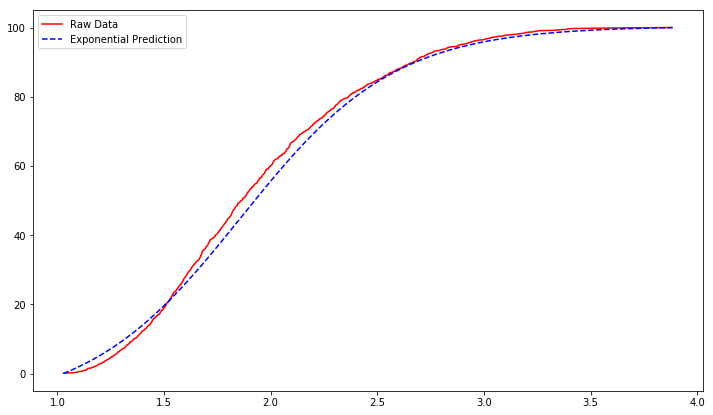

In [37]:
simulate(4)

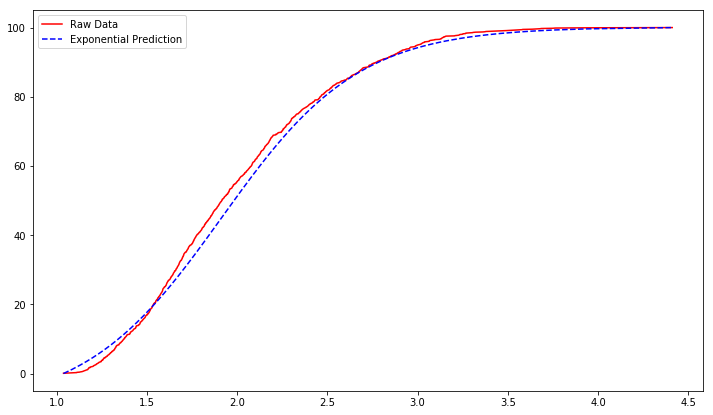

In [38]:
simulate(4, 20)